In [10]:
# -*- coding: utf-8 -*-
"""
Created on Tue May  9 13:21:10 2023

@author: DELL
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from scipy.optimize import curve_fit
import cluster_tools as ct
import sklearn.metrics as skmet
import os


os.environ["OMP_NUM_THREADS"] = '1'

# Function to read the dataset
def read_worldbank_dataset():
    """
        This function reads in a climate change dataset from worldbank,
        and remove all unnecessary columns from the dataframe.
    """
    # Reads the csv dataset, passed as an argument into the function
    # Also skip the first four rows of the dataset
    worldbank_dataframe = pd.read_csv("worldbank_data.csv", skiprows=4)
        
    # Retrieve relevant indicators
    indicators = ['Urban population growth (annual %)',]
    dataframe = worldbank_dataframe[worldbank_dataframe['Indicator Name']
                                    .isin(indicators)]
    
    # A list of the unnecessary columns to remove from the dataframe
    columns_to_drop = ["Country Code", "Indicator Code", "Unnamed: 66"]
    
    # Remove unnecessary columns from the dataframe 
    dataframe = dataframe.drop(labels=columns_to_drop, axis=1)
        
    # Reset the index and drop the index column
    dataframe = dataframe.reset_index()
    dataframe = dataframe.drop("index", axis=1)
     
    return dataframe


worldbank_dataframe = read_worldbank_dataset()
print(worldbank_dataframe.describe())

       1960        1961        1962        1963        1964        1965  \
count   0.0  262.000000  262.000000  262.000000  262.000000  262.000000   
mean    NaN    4.201589    4.290752    4.367809    4.332657    4.278745   
std     NaN    2.253653    2.242323    2.338750    2.277187    2.486997   
min     NaN   -0.465549   -0.483504   -0.484474   -0.472633   -1.134876   
25%     NaN    2.715284    2.817557    2.763953    2.780178    2.598520   
50%     NaN    4.156738    4.152995    4.249545    4.218799    4.014093   
75%     NaN    5.123042    5.182353    5.325906    5.319848    5.253229   
max     NaN   15.080977   15.059320   15.126651   14.889190   16.123165   

             1966        1967        1968        1969  ...        2012  \
count  262.000000  262.000000  262.000000  262.000000  ...  263.000000   
mean     4.189373    4.173579    4.212818    4.160470  ...    2.020726   
std      2.441571    2.499011    2.678639    2.739302  ...    1.819807   
min     -1.203602   -1.23365

         1970      1990      2010      2020
0   -0.406898  1.683480  0.294374  0.479958
1    4.807084  5.078850  4.129107  4.068591
2    5.644844  0.623574  3.779279  4.185357
3    4.961353  4.700508  4.466047  3.923804
4    5.239910  7.223497  4.995581  4.242778
..        ...       ...       ...       ...
261       NaN       NaN       NaN       NaN
262  6.224598  6.474593  4.778039  3.999744
263  3.233725  4.106003  2.050150  1.965305
264  6.192305  2.447114  4.760365  4.189738
265  5.914239  5.259790  0.706879  2.130421

[266 rows x 4 columns]
             1970        1990        2010        2020
count  262.000000  262.000000  262.000000  262.000000
mean     4.081797    2.804002    2.083438    1.733749
std      2.636242    2.940371    1.895090    1.546087
min     -0.862550  -27.707932   -5.258535   -2.497206
25%      2.321136    1.087320    0.712119    0.580602
50%      3.777634    2.876235    2.054931    1.681384
75%      5.141396    4.428872    3.388812    2.859194
max     16.29559

<Figure size 900x900 with 0 Axes>

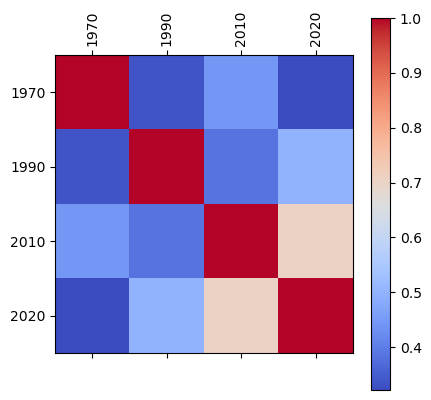

In [12]:
dataframe = worldbank_dataframe[["1970", "1990", "2010", 
                                     "2020"]].copy()
print(dataframe)


# Drop rows with NaN in 2020
cleaned_dataframe = dataframe.dropna()
print(cleaned_dataframe.describe())

cleaned_dataframe = cleaned_dataframe.reset_index()
cleaned_dataframe = cleaned_dataframe.drop("index", axis=1)

corr = cleaned_dataframe.corr()

plt.figure(figsize=(9, 9))

# fig, ax = plt.subplots()
plt.matshow(corr, cmap='coolwarm')

# setting ticks to column names
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.colorbar()
plt.show()

In [ ]:
# normalise, store minimum and maximum
normalized_dataframe, dataframe_min, dataframe_max = ct.scaler(
    cleaned_dataframe)

print()
print("n score")
# loop over number of clusters
for ncluster in range(2, 10):
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters=ncluster)
    # Fit the data, results are stored in the kmeans object
    kmeans.fit(normalized_dataframe) # fit done on x,y pairs
    labels = kmeans.labels_
    # extract the estimated cluster centres
    cen = kmeans.cluster_centers_
    # calculate the silhoutte score
    print(ncluster, skmet.silhouette_score(cleaned_dataframe, labels))

ncluster = 7

# set up the clusterer with the number of expected clusters
kmeans = KMeans(n_clusters=ncluster)

# Fit the data, results are stored in the kmeans object
kmeans.fit(normalized_dataframe) # fit done on x,y pairs
labels = kmeans.labels_

# extract the estimated cluster centres
cen = kmeans.cluster_centers_
cen = np.array(cen)
xcen = cen[:, 0]
ycen = cen[:, 1]

# cluster by cluster
plt.figure(figsize=(7.0, 7.0))
cm = plt.cm.get_cmap('tab10')
plt.scatter(normalized_dataframe["1970"], normalized_dataframe["2020"], 
            10, labels, marker="o", cmap=cm)
plt.scatter(xcen, ycen, 45, "k", marker="d")

plt.title("Clustering for Annual Urban population growth(2000 & 2020)")

plt.xlabel("2000")
plt.ylabel("2020")

plt.show()



#data_correlation = cleaned_dataframe.corr()
#print(data_correlation)